In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('trajectories-0400pm-0415pm_editted.csv')

In [3]:
df = df[df["Direction"] != 4]

In [4]:
df = df.drop(['Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'Frame_ID', 'Tot_Frames', 'Veh_Len', 'Veh_Wid', 'Section', 'Direction', 'Veh_Class', 'Vehicle_Acc', 'Preceding_Veh', 'Following_Veh', 'Spacing', 'Headway'], axis=1)

In [5]:
idx = df.groupby("Vehicle_ID")['Epoch_ms'].transform(min) == df['Epoch_ms']
df_min_match = df[idx].reset_index(drop=True)
df_min_match = df_min_match.sort_values(by='Epoch_ms')

idx = df.groupby("Vehicle_ID")['Epoch_ms'].transform(max) == df['Epoch_ms']
df_max_match = df[idx].reset_index(drop=True)
df_max_match = df_max_match.sort_values(by='Epoch_ms')

In [6]:
df_final = df_min_match.copy()
df_final["Movement_Last"] = df_max_match["Movement"]
df_final["Intersection_Last"] = df_max_match["Intersection"]
df_final["Interarrival"] = df_min_match["Epoch_ms"].diff()
df_final["Leave_Time"] = df_max_match["Epoch_ms"]

In [7]:
df_final.head()

,Vehicle_ID,Epoch_ms,Veh_Velocity,Lane_ID,Org_Zone,Dest_Zone,Intersection,Movement,Movement_Last,Intersection_Last,Interarrival,Leave_Time
0,2,1163033200,16.59,0,102,214,1,3,1,5,NaN,1163201100
1,13,1163034600,20.01,0,102,203,1,3,1,0,1400.0,1163092200
2,15,1163034800,17.29,1,101,214,0,1,1,5,200.0,1163206000
3,17,1163036300,25.79,1,101,214,0,1,1,5,1500.0,1163207900
4,21,1163039100,23.83,2,101,202,0,1,1,0,2800.0,1163059900


In [8]:
df_final.to_csv("Processed_vehicle_data.csv", index=False)

In [9]:
l = len(df_final.index)
b = round(math.sqrt(l))

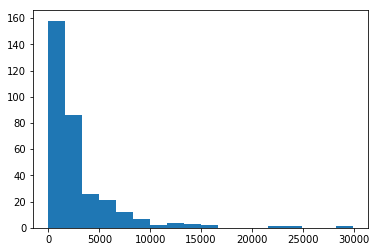

In [15]:
n, bins, patches = plt.hist(df_final["Interarrival"], b)

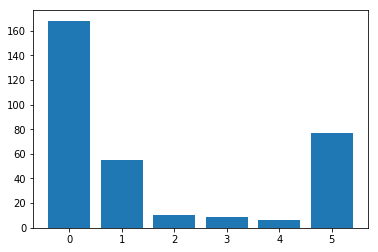

In [11]:
x = df_final["Intersection"].value_counts()
x = x.sort_index()
a = plt.bar(list(x.index), list(x.values))

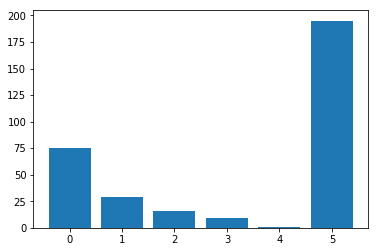

In [12]:
x = df_final["Intersection_Last"].value_counts()
x = x.sort_index()
a = plt.bar(list(x.index), list(x.values))

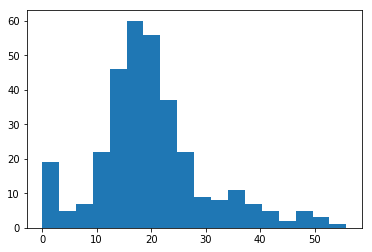

In [13]:
n, bins, patches = plt.hist(df_final["Veh_Velocity"], b)

([<matplotlib.axis.XTick at 0xc211710>,
 <a list of 3 Text xticklabel objects>)

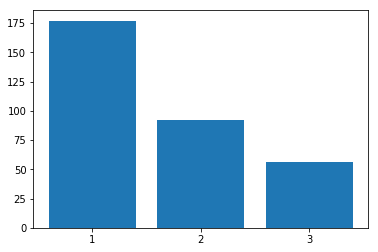

In [16]:
x = df_final["Movement"].value_counts()
x = x.sort_index()
a = plt.bar(list(x.index), list(x.values))
plt.xticks((1,2,3))